# BLG 549E GRAPH THEORY FALL 2020 TERM PROJECT 

### Selin Hülagü - 501202405

### Sercan Akti - 501202407

In [2]:
import numpy as np
import pandas as pd
from mat4py import loadmat
import networkx as nx
import random as rd
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
import math
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Part I

In this project, we evaluate the ease of graphs to get congested in time by assigning all demands to the shortest paths, where it is mainly a challenge and also a good metric to compare road networks. In this context, we handle a real world road network as G1, which represents the road network of Quebec, Canada [Jaballah et al. 2019]. Considering the nature of real world road networks where there are many nodes which can represent attraction points or intersections with degrees (2-3, 4 at most), as the second graph, G2, we consider a scale free graph in which there are nearly same number of edges as G1 but considerable less nodes. The general topology of scale free graphs that brings heterogenity to the network where majority of node has low degree (1-2), except few nodes that ensures connectivity within networks [Albert et al. 2000], enables us to compare how the metrics that we've concantrated will change if we design road networks by aggreagating some nodes together instead of having many nodes with low degrees. 

Both in G1 and G2 nodes represents intersections/attraction points and edges represents roads, in a road network. Nodes have demand, and edges have (i) free flow time, (ii) capacity, (iii) volume, and (iv) cost as attributes, which are explained in detail in part II. 

In [2]:
G1 = nx.read_edgelist('canada.txt', nodetype=int)
for (u,v) in G1.edges:
    G1.add_edge(u, v, volume=0)
    G1.add_edge(u,v, capacity=rd.randrange(500, 1000, 100))
    G1.add_edge(u,v, ff_cost=rd.uniform(0,0.1))
    G1.add_edge(u,v, cost=0)
for (u,v) in G1.edges:
    G1.edges[u,v]['cost']=G1.edges[u,v]['ff_cost']

In [3]:
n=150;
m=3;
G2=nx.barabasi_albert_graph(n, m, seed=None)
for (u,v) in G2.edges:
    G2.add_edge(u, v, volume=0)
    G2.add_edge(u,v, capacity=rd.randrange(500, 1000, 100))
    G2.add_edge(u,v, ff_cost=rd.uniform(0,0.1))
    G2.add_edge(u,v, cost=0)
for (u,v) in G2.edges:
    G2.edges[u,v]['cost']=G2.edges[u,v]['ff_cost']


 Number of nodes in G1: 357 
 Number of edges in G1: 409

 Number of nodes in G2: 150 
 Number of edges in G2: 441


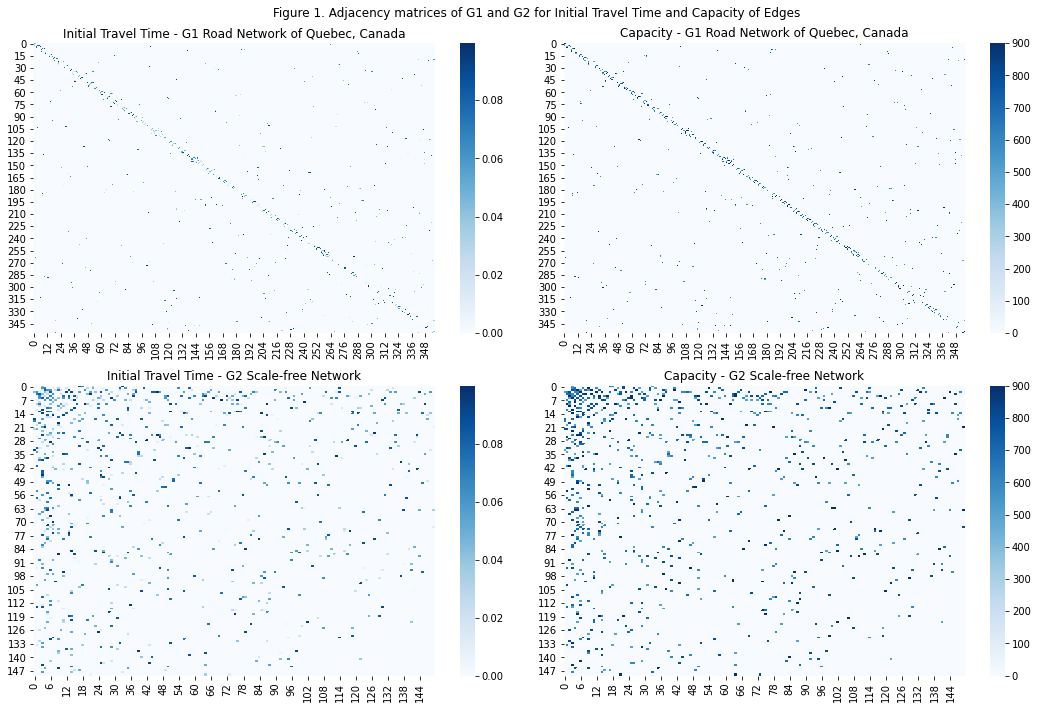

In [4]:
print('\n','Number of nodes in G1:', len(G1.nodes), '\n', 'Number of edges in G1:', len(G1.edges))
print('\n','Number of nodes in G2:', len(G2.nodes), '\n', 'Number of edges in G2:', len(G2.edges))

adj_1w=nx.adjacency_matrix(G1, weight='ff_cost').todense()
adj_1c=nx.adjacency_matrix(G1, weight='capacity').todense() 
adj_2w=nx.adjacency_matrix(G2, weight='ff_cost').todense()
adj_2c=nx.adjacency_matrix(G2, weight='capacity').todense()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
ax1 = plt.subplot(221)  
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)  
ax4 = plt.subplot(224)

ax = sns.heatmap(adj_1w, cmap="Blues", ax=ax1)
ax1.set_title('Initial Travel Time - G1 Road Network of Quebec, Canada')
ax = sns.heatmap(adj_1c, cmap="Blues", ax=ax2)
ax2.set_title('Capacity - G1 Road Network of Quebec, Canada')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

ax = sns.heatmap(adj_2w, cmap="Blues", ax=ax3)
ax3.set_title('Initial Travel Time - G2 Scale-free Network')
ax = sns.heatmap(adj_2c, cmap="Blues", ax=ax4)
ax4.set_title('Capacity - G2 Scale-free Network')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
fig.suptitle("Figure 1. Adjacency matrices of G1 and G2 for Initial Travel Time and Capacity of Edges")
fig.tight_layout()
plt.show()


In [5]:
s1=[val for (node,val) in G1.degree(weight='capacity')]
n1=[val for (node,val) in G1.degree()]
s2=[val for (node,val) in G2.degree(weight='capacity')]
n2=[val for (node,val) in G2.degree()]

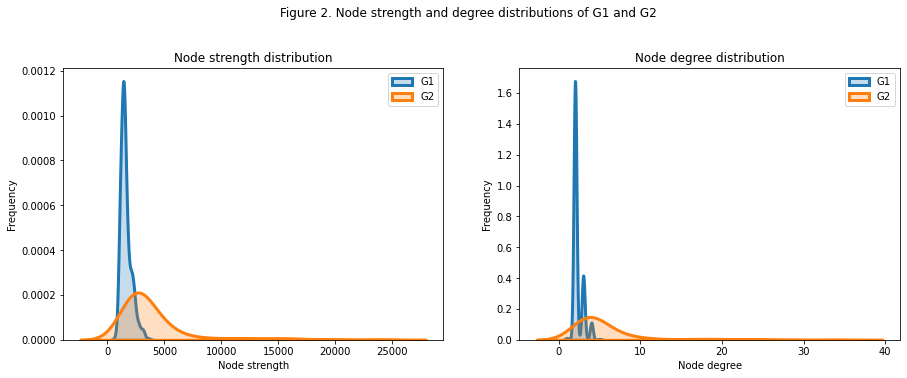

In [6]:
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(15, 5))
sns.distplot(s1, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = 'G1', ax=ax[0])
sns.distplot(s2, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = 'G2', ax=ax[0])
sns.distplot(n1, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = 'G1', ax=ax[1])
sns.distplot(n2, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = 'G2', ax=ax[1])
ax[0].set_xlabel('Node strength')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Node strength distribution')
ax[0].legend(['G1', 'G2'])
ax[1].set_xlabel('Node degree')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Node degree distribution')
ax[1].legend(['G1', 'G2'])
fig.suptitle("Figure 2. Node strength and degree distributions of G1 and G2", y=1.05)
plt.show()

# Part II: Our graph theory principle is 'Shortest Path Routing'

In this project, by handling shortest path routing principle where each user takes the shortest path to reach their destination, we aim to investigate how shortest paths may change over time by assigning users on them, and hence, to discover the congestion level on given networks after the assignments. Here it is worth to point out we mainly consider the road networks where the term "shortest" is (mainly) based on time. Suppose that initially there are no vehicles on a given road network, the demand will be assigned according to the free flow time on roads/edges, where free flow time can be defined as an edge attribute to quantify the travel time on an edge without any traffic/congestion. Here the point is, after assigning vehicles to the shortest paths, edges get to be congested, and the travel time on each edge will change according to the number of vehicle assign to it. When one wants to assign new coming demand to the network, where there are already assigned vehicles on it, shortest paths in terms of travel time may be different from the previous one. Moreover, after number of assignments, some edges/roads may gets fully congested, means that no more vehicle can be added to that edge/road. In this context, we focus on finding the number of congested edges after number of assignment to a road network, and determine the Congestion Factor (CF) that is defined Wu et al. (2006), to compare different network topologies in terms of the tendency on getting congested considering travel time based shortest path assignments.

The proposed methodology is summarized below illustration;

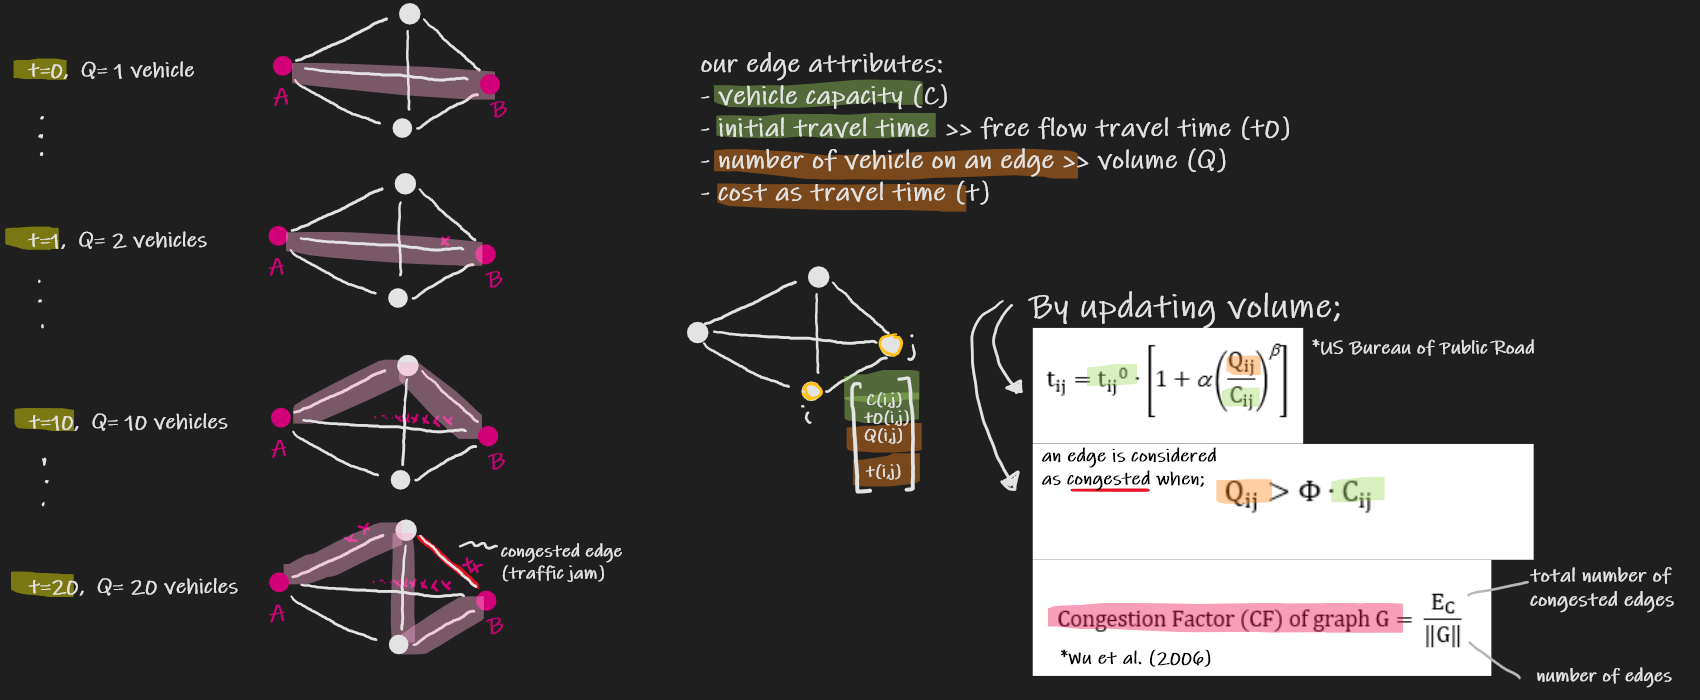

In [4]:
im=Image.open('summary.png')
im

Considering a road network graph defined as G=(N, A), where N and A represents nodes and edges/arcs, here are the table of notations used in this project given in Table 1. 

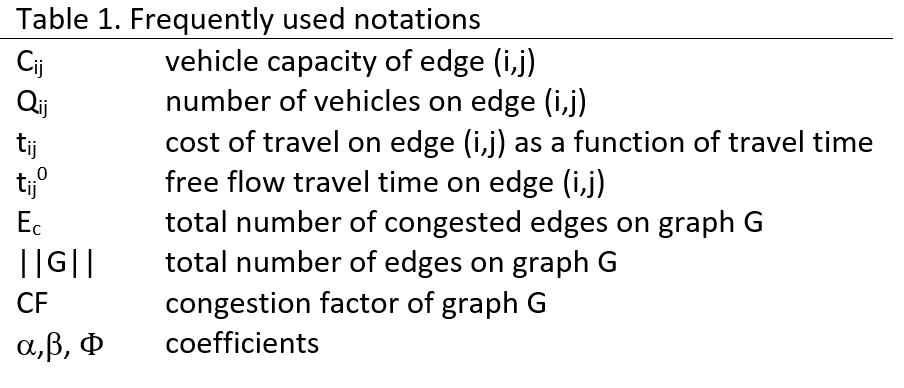

In [2]:
im=Image.open('Table1.png')
im

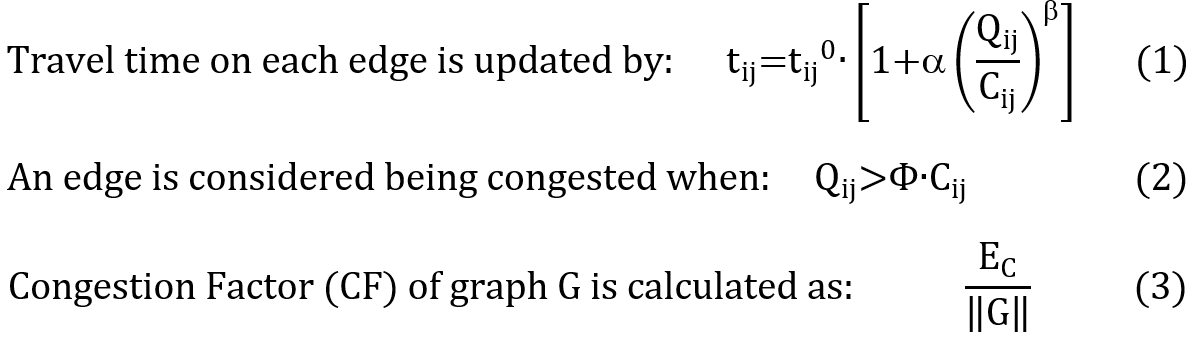

In [3]:
im=Image.open('Equations.png')
im

By using the link performance function defined by US Bureau of Public roads (Eq.1) travel time on edge is updated respecting to its capacity and the volume assign on it. An edge is considered to be congested (no more vehicle can enter on that edge) by using the relationship between the volume and the capacity given in Eq. 2. And the congestion factor defined by Wu et al.(2006) as the ratio of the total number congested edges to the total number of edges is given in Eq. 3. Overall algorithm that we've proposed is given below. 

Here it is worth to note that, we use Dijkstra's shortest path algorithm while determining the shortest paths since there are no negative edges in terms of travel time in transportation networks. 

Please also note that, S represents the set of shortest paths as edge tuples, e(i,j).

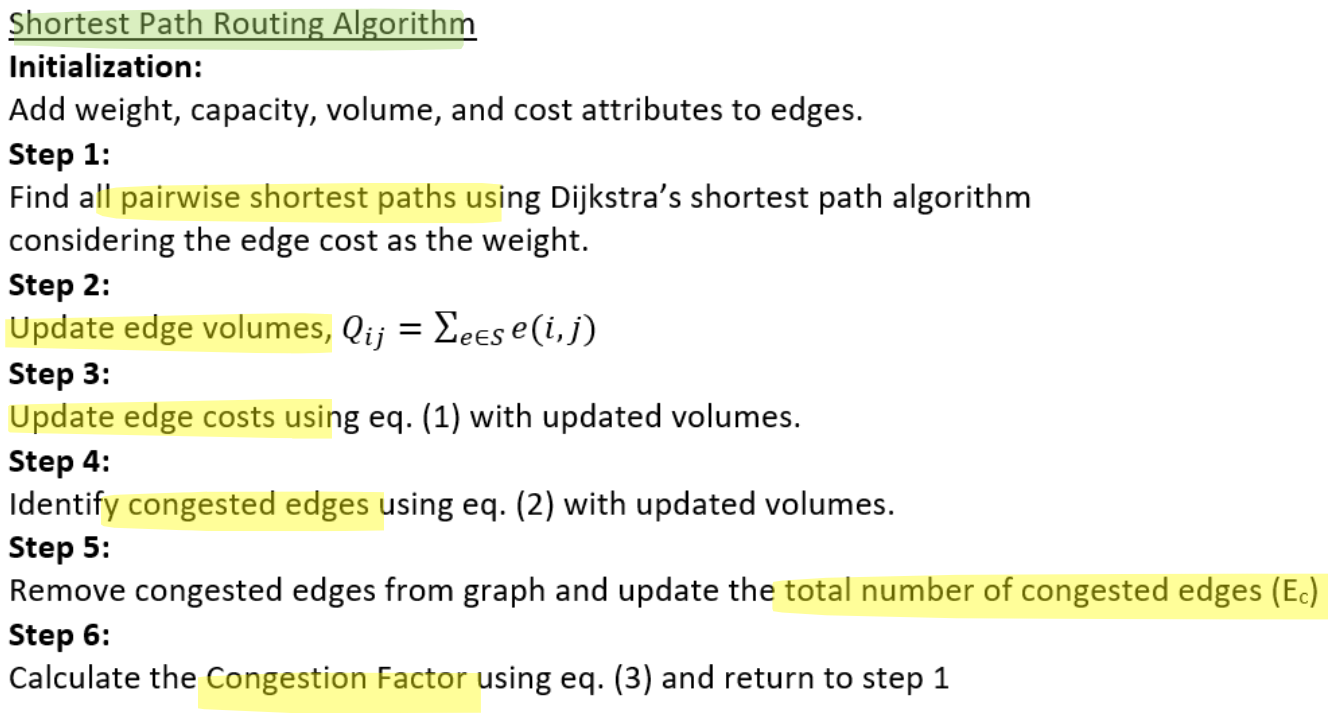

In [4]:
im=Image.open('Algorithm.png')
im

In [2]:
def ShortestPathRouting (G, num_iter):
    ''' ShortestPathRouting function takes graph G and number of iteration num_iter as inputs, 
    and outputs a (i) data frame SPR that includes iteration step, and congestion factor and global efficiency 
    corresponding to that iteration step, (ii) the graph list that includes graphs generated at each step. 
    Please note that it is assumed that, at each time step pairwise demand is generated between any node pairs (i,j)
    that are reachable for each other'''
    
    #INITIALIZATION
    #this is just for outputting
    index=[i for i in range (0, num_iter)]
    columns=['Iter', 'CongestionFactor','GlobalEfficiency']
    SPR=pd.DataFrame(columns=columns, index=index)
    #number of edges on reference graph and the normalization value (norm) for global efficiency calculation
    num_edges=len(G.edges)
    norm=1/(len(G.nodes)*(len(G.nodes)-1))
    
    '''if one wants to generate edge attributes with algorithm, should activate this code.
    Since within the homework, we need to generate our graphs before the algorithm, we just de-activate this part
    (capacity, ff_cost =free flow time, volume, cost -travel time-, are defined) 
    for (u,v) in G.edges:
        G.add_edge(u,v, capacity=random.randint(10,20))
        G.add_edge(u,v, ff_cost=random.uniform(0,0.1))
        G.add_edge(u, v, volume=0)
        G.add_edge(u,v, cost=0)
    for (u,v) in G.edges:
        G.edges[u,v]['cost']=G.edges[u,v]['ff_cost'] #initially, travel time on any edge is equal to the free flow time on each.
    '''
    
    EC=0 #counter of congested edges starting from 0
    Graphs=[] #graph list that is generated each iteration
    Graphs.append(nx.Graph(G)) #referance graph is added
    for i in range (0,num_iter):
        #STEP 1
        #pairwise shortest paths are calculated and stored in list S as edge tuples
        path = dict(nx.all_pairs_dijkstra_path(G, weight='cost'))
        S=[]
        for j in range (0, len(path)):
            SS=list(path[j].values())
            for m in range (0, len(SS)):
                S1=(zip(SS[m][:-1], SS[m][1:]))
                S+=list(S1)
        #STEP 2
        #edge volumes are updated by counting the number of times the edge is used. 
        for t in S:
            if t in G.edges:
                G[t[0]][t[1]]['volume']+=1
            else:
                G[t[0]][t[1]]['volume']=0
        #STEP 3
        #edge costs are updated respecting to the volumes
        for (u,v) in G.edges:
            G.edges[u,v]['cost']= G.edges[u,v]['ff_cost']*(1+0.15*math.pow((G.edges[u,v]['volume']/G.edges[u,v]['capacity']),4))
        #STEP 4
        #congested edges are identify
        for (u,v) in G.edges:
            if G.edges[u,v]['volume'] > 2*G.edges[u,v]['capacity']:
                #STEP 5
                #congested edges are removed from graph (since they cannot be used any more) 
                #total number of congested edges are updated
                G.remove_edge(u,v)
                #G.edges[u,v]['cost']=math.inf
                EC+=1
        Graphs.append(nx.Graph(G))
        #STEP 6
        #Congestion factor is calculated and stored in data frame 
        SPR.iloc[i][1]=EC/num_edges
        
        #global efficiency is calculated and stored in dataframe to compare results
        def globalEfficiency (G, norm):
            lij=dict(nx.all_pairs_dijkstra_path_length(G, weight="cost"))
            gEff=0
            for i in G.nodes:
                for j in range (0,len(lij[i])):
                    if np.array(list(lij[i].values()))[j] != 0:
                        gEff+=(1/np.array(list(lij[i].values()))[j])
            return gEff*norm
        SPR.iloc[i][2]=globalEfficiency(G, norm)
        
        SPR.iloc[i][0]=i+1 #just for outputting
    return SPR, Graphs

In [11]:
#a small example is runned to show how the algorithm works 
G=nx.erdos_renyi_graph(10, 0.8, seed=1)
for (u,v) in G.edges:
    G.add_edge(u,v, capacity=rd.randint(10,20))
    G.add_edge(u,v, ff_cost=rd.uniform(0,0.1))
    G.add_edge(u, v, volume=0)
    G.add_edge(u,v, cost=0)
for (u,v) in G.edges:
    G.edges[u,v]['cost']=G.edges[u,v]['ff_cost'] #initially, travel time on any edge is equal to the free flow time on each.
H=G.copy()
Data, g_list=ShortestPathRouting (H, 4)

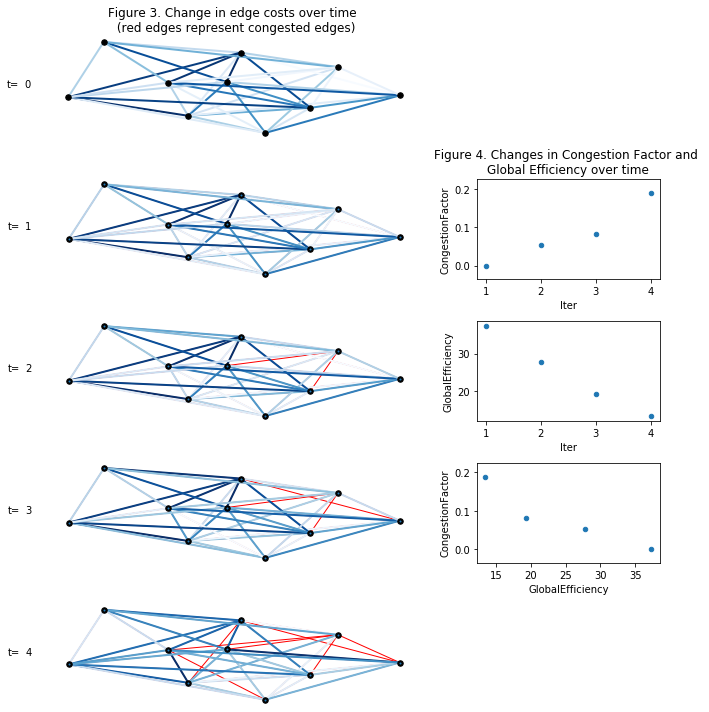

In [12]:
#this is for illustrating the results
fig, ax = plt.subplots(nrows= 5, ncols=2, figsize=(10, 10),  gridspec_kw={'width_ratios': [2, 1]})
pos = nx.kamada_kawai_layout(G, scale=100000)
for i in range(1,len(g_list)):
    nx.draw(G,pos, edge_color='red',node_size=30,node_color='black', ax=ax[i][0])
    costs = [g_list[i][u][v]['cost'] for u,v in g_list[i].edges]
    nx.draw(g_list[i],pos, edge_color=costs,width=2.0,node_size=1, edge_cmap=plt.cm.Blues, ax=ax[i][0])
    ax[i][0].text(-130000, -20,'t=')
    ax[i][0].text(-120000, -20,i)
ax[0][0].set_title('Figure 3. Change in edge costs over time \n (red edges represent congested edges)')
in_costs=[g_list[0][u][v]['cost'] for u,v in g_list[0].edges]
nx.draw(g_list[0],pos, edge_color=in_costs, width=2.0,node_size=30,node_color='black',edge_cmap=plt.cm.Blues, ax=ax[0][0])
ax[0][0].text(-130000, -20,'t=')
ax[0][0].text(-120000, -20,0)
Data.plot.scatter(x='Iter', y='CongestionFactor', ax=ax[1][1])
Data.plot.scatter(x='Iter', y='GlobalEfficiency', ax=ax[2][1])
Data.plot.scatter(x='GlobalEfficiency', y='CongestionFactor', ax=ax[3][1])
ax[1][1].set_title('Figure 4. Changes in Congestion Factor and \nGlobal Efficiency over time')
fig.delaxes(ax[0][1])
fig.delaxes(ax[4][1])
plt.tight_layout()
plt.show()

Results derived using a small sample network are illustrated on Figure 3 and Figure 4. From Figures, it is seen that, starting from initial configuration (t=0), by assigning the traffic demand to the shortest paths, some edges get congested that are shown in red in Figure 3. We can see that the edges got congested in t=i, are generally the least costs edges in t=i-1, since traffic will be assigned to those edges in t=i. We can also see how congestion factor increases and global efficiency decreases with the assignment steps in Figure 4, while these relationships will be analyzed deeply in Part III and IV. 

# Part III 

Within the shortest path routing algorithm defined in Part II, we've decided to consider congestion factor and global efficiency value as the metrics to investigate. Actually the reason to select those two metrics is related with the nature of the graph principle we've focused on. Applying the shortest path algorithm each step by updating the edge attributes will reveal the congested edges which will vary network by network according their topologies. The number and as well as the position of congested edges will affect the connectivity within a network, since congested edges cannot ensure any connectance between the nodes that are previously connected, so the connectivity, hence the efficiency will be affected. We can forsee that as we do the assignment, congestion factor will tend to increase while global efficiency will tend to decrease. But it is worth to analyse the relationship between them and also reveal the difference network by network in order to make some interpretations on network topologies and how easy for them to get congested or become inefficient in terms of travel times. 

Therefore, in addition to the congestion factor defined in Eq. (3), can be called as the first metric, P1, Eq. (4) shows how to calculate the second metric, P2, namely global efficiency, where |G| refers to the number of nodes in graph G, and dij denotes the shortest path between node i and j. Please note that, ShortestPathRouting function includes global efficiency calculation as well. 

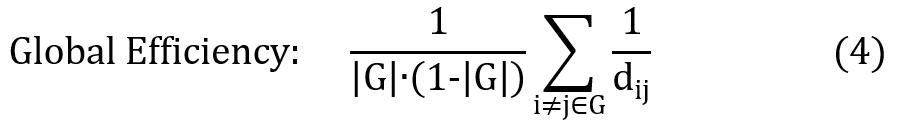

In [16]:
im=Image.open('GlobalEfficiency.png')
im

In [10]:
#here first the difference between G1 and G2 on P1 and P2 in 50 iterations is analyzed.
H1=G1.copy()
DataG1, g_list=ShortestPathRouting (H1, 50)

H2=G2.copy()
DataG2, g_list=ShortestPathRouting (H2, 50)

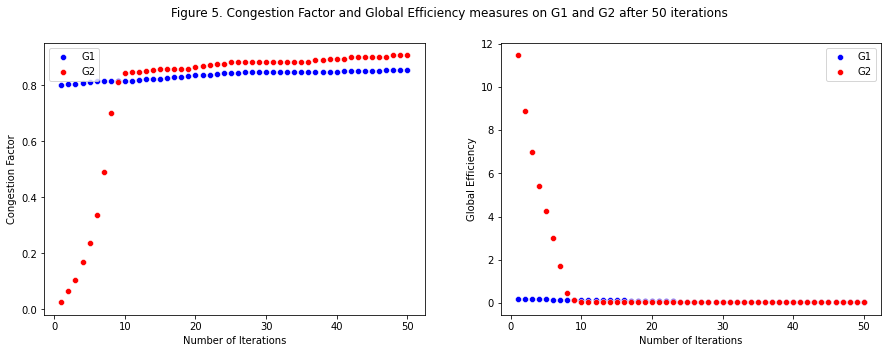

In [11]:
fig= plt.figure(figsize=(15,5))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
sns.scatterplot(data=DataG1, x="Iter",y="CongestionFactor", color="blue", ax=ax1)
sns.scatterplot(data=DataG2, x="Iter",y="CongestionFactor", color="red", ax=ax1)
sns.scatterplot(data=DataG1, x="Iter",y="GlobalEfficiency", color="blue", ax=ax2)
sns.scatterplot(data=DataG2, x="Iter",y="GlobalEfficiency", color="red", ax=ax2)
ax1.set_xlabel("Number of Iterations")
ax1.set_ylabel("Congestion Factor")
ax2.set_xlabel("Number of Iterations")
ax2.set_ylabel("Global Efficiency")
ax1.legend(['G1', 'G2'])
ax2.legend(['G1', 'G2'])
fig.suptitle("Figure 5. Congestion Factor and Global Efficiency measures on G1 and G2 after 50 iterations")
plt.show()

From results given in Figure 5, one can derive that on one hand since majority of the nodes in G1 contribute similarly to the network as seen in Figure 2, whole network nearly gets congested in one iteration, and connectivity within network greatly is damaged. However, the congestion within network remains nearly stable by iteration, after majority of edges got congested. On the other hand, since scale free networks enable heterogeneity within a network, it takes time G2 to be congested. Although congestion slowly occur in G2, it is seen that, G2 can be more congested than G1.  

It is worth to note that, having 50 iteration is not realistic considering real world condition for road networks, since if we consider each iteration as 1 minute, it is not commonly possible for any vehicle to stay on the same edge/road 50 minutes. But the above analysis (given with Figure 5) were done to examine the general topology of G1 and G2 with respect to our algorithm. The rest of the simulations are conducted handling the 6th iteration's values for congestion factor and global efficiency to be representative for any network, since we have added each edges a free flow travel time that has maximally 6 minutes (0.1 * 60), means that any vehicle can stay an edge for 6 minutes.   

In order to simulate graphs with the same node strength distribution of G1 and G2, we try construct adjacency matrices that have same strength values. In this context, for initiliazation, we shuffle the strength array of Gi, and create an empty adjacency matrix to fill. Then, for each row i in the empty adjacency matrix, we randomly select a column (i+1) and assign a number to it, and repeat it while the sum of row i is smaller than the value of ith element of shuffled strength array. We also control the sum of row i with -if- statement, where if any assignment will cause to an excess amount the ith element of shuffled strength array, the excessive value will subtracted. 

Please note that this is a greedy algorithm, that not guarantees to generate exactly the same strength distribution, but we found results satisfactory enough.

The illustration below summarize the algorithm to generate graphs respecting to the reference graph's strength distribution

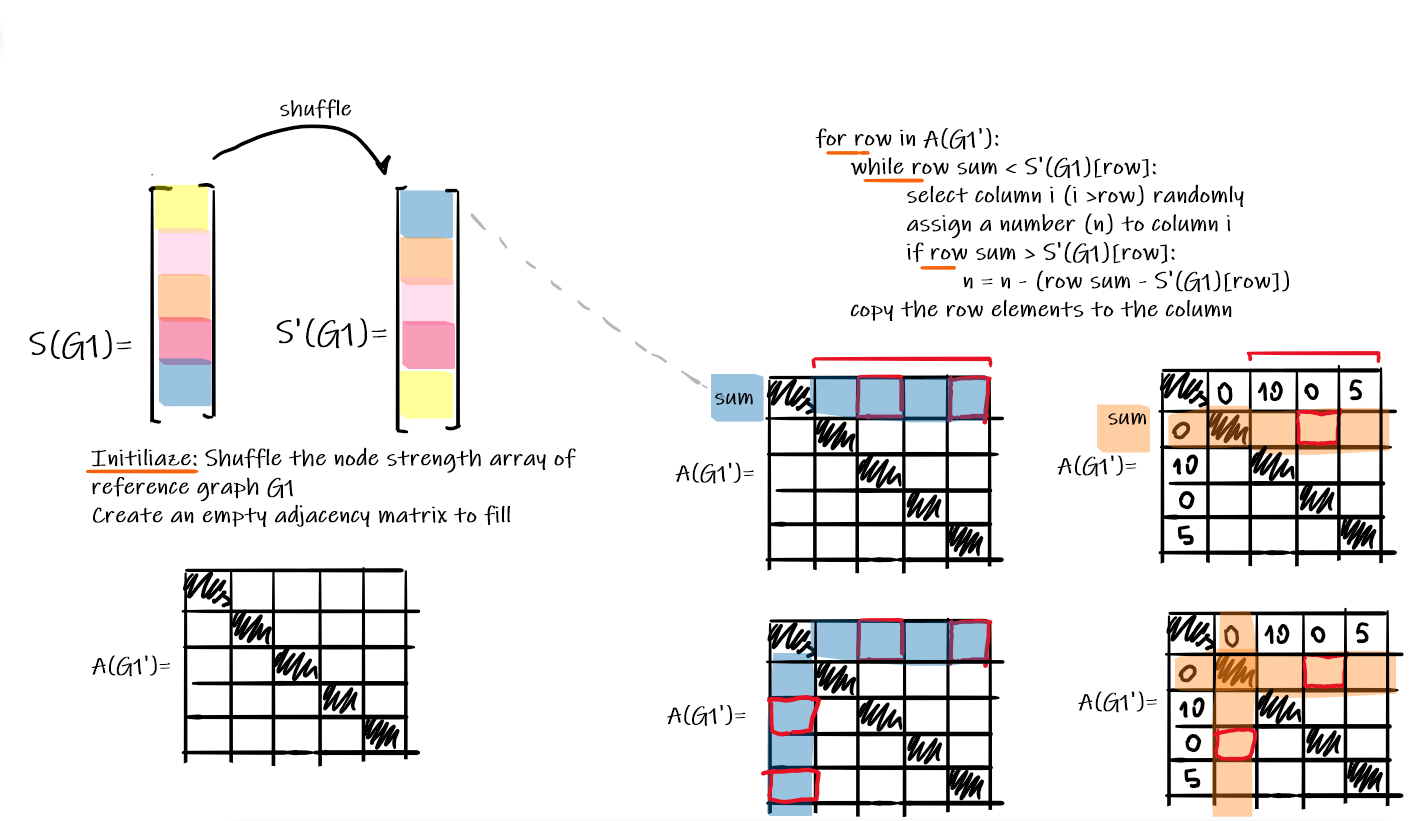

In [190]:
im=Image.open('strength_dist_simulation.png')
im

In [12]:
rd.shuffle(s1)

In [13]:
num1=0
G1_list=[]

In [118]:
index=[m for m in range(0, len(G1.nodes))]
columns=[n for n in range(0, len(G1.nodes))]
Adj=pd.DataFrame(columns=columns, index=index)
for j in range (0,len(G1.nodes)-1):
    while Adj.iloc[j].sum()<s1[j]: #iteration will continue as long as the row sum is smaller than corresponding strength value
        i = rd.randint(j+1,len(G1.nodes)-1) #a column (starting from j+1th index) is selected randomly 
        Adj.iloc[j][i]=rd.randrange(500, 1000 , 100) #weight is assign according to the limits. Here we use capacity as strength value since we found edge capacities as the most representative attribute for this specific study
        if Adj.iloc[j].sum()>s1[j]: #checking whether assign value will cause to an excessive amount
            Adj.iloc[j][i]=Adj.iloc[j][i]-(Adj.iloc[j].sum()-s1[j])
    Adj.loc[j+1:len(G1.nodes),j]=Adj.iloc[j,j+1:len(G1.nodes)]#determined row is copied to its corresponding column
Adj=Adj.fillna(0)
Gsim=nx.from_numpy_array(np.array(Adj))
G1_list.append(Gsim)#generated graph is appended to the list
num1+=1
print(num1)

100


In [126]:
rd.shuffle(s2)

In [127]:
num2=0
G2_list=[]

In [269]:
index=[m for m in range(0, len(G2.nodes))]
columns=[n for n in range(0, len(G2.nodes))]
Adj=pd.DataFrame(columns=columns, index=index)
for j in range (0,len(G2.nodes)-1):
    while Adj.iloc[j].sum()<s2[j]:
        i = rd.randint(j+1,len(G2.nodes)-1)
        Adj.iloc[j][i]=rd.randrange(500, 1000 , 100)
        if Adj.iloc[j].sum()>s2[j]:
            Adj.iloc[j][i]=Adj.iloc[j][i]-(Adj.iloc[j].sum()-s2[j])
    Adj.loc[j+1:len(G2.nodes),j]=Adj.iloc[j,j+1:len(G2.nodes)]
Adj=Adj.fillna(0)
Gsim=nx.from_numpy_array(np.array(Adj))
G2_list.append(Gsim)
num2+=1
print(num2)

100


In [270]:
#strength values are calculated in each graph
sim1=[]
for i in range (0,len(G1_list)):
    s_sim1=[val for (node,val) in G1_list[i].degree(weight='weight')]
    sim1.append(s_sim1)
sim2=[]
for i in range (0,len(G2_list)):
    s_sim2=[val for (node,val) in G2_list[i].degree(weight='weight')]
    sim2.append(s_sim2)

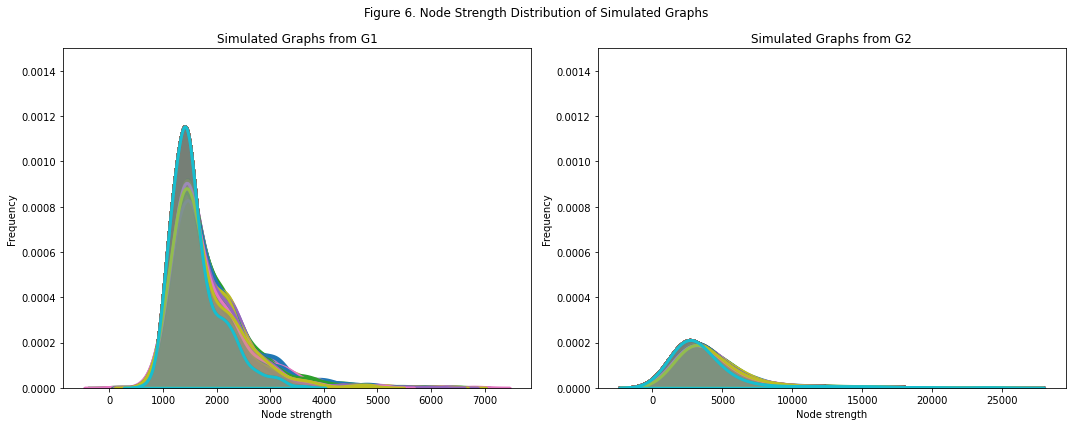

In [271]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
ax1 = plt.subplot(121)  
ax2 = plt.subplot(122) 

for i in range(0, len(sim1)):
    sns.distplot(sim1[i], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, ax=ax1)
    sns.distplot(s1, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, ax=ax1)
    
for i in range(0, len(sim2)):
    sns.distplot(sim2[i], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, ax=ax2)
    sns.distplot(s2, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, ax=ax2)
    
ax1.set_title('Simulated Graphs from G1')
ax1.set_xlabel('Node strength')
ax1.set_ylabel('Frequency')
ax1.set_ylim(0,0.0015)

ax2.set_title('Simulated Graphs from G2')
ax2.set_xlabel('Node strength')
ax2.set_ylabel('Frequency')
fig.suptitle('Figure 6. Node Strength Distribution of Simulated Graphs')
ax2.set_ylim(0,0.0015)

fig.tight_layout()

In [272]:
#all edge attributes are assigned to the graphs
for graph in G1_list:
    for (u,v) in graph.edges():
        graph.add_edge(u, v, volume=0)
        graph.add_edge(u, v, capacity=0)
        graph.add_edge(u,v, ff_cost=rd.uniform(0,0.1))
        graph.add_edge(u,v, cost=0)
    for (u,v) in graph.edges:
        graph.edges[u,v]['cost']=graph.edges[u,v]['ff_cost']
        graph.edges[u,v]['capacity']=graph.edges[u,v]['weight']

In [273]:
for graph in G2_list:
    for (u,v) in graph.edges():
        graph.add_edge(u, v, volume=0)
        graph.add_edge(u, v, capacity=0)
        graph.add_edge(u,v, ff_cost=rd.uniform(0,0.1))
        graph.add_edge(u,v, cost=0)
    for (u,v) in graph.edges:
        graph.edges[u,v]['cost']=graph.edges[u,v]['ff_cost']
        graph.edges[u,v]['capacity']=graph.edges[u,v]['weight']

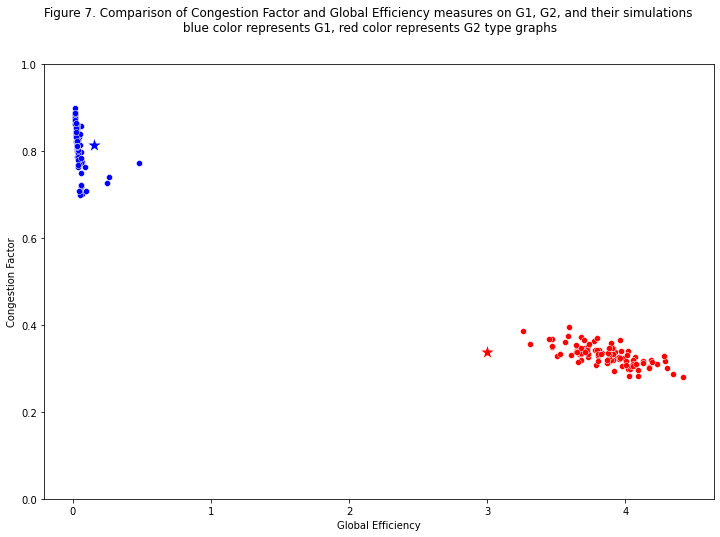

In [275]:
#R space for anchor and simulated graphs are given in Figure 7
fig= plt.figure(figsize=(12,8))
ax1=fig.add_subplot(111)
for graph in G1_list:
    H=graph.copy()
    Data_s1, g_list=ShortestPathRouting (H, 6)
    sns.scatterplot(data=Data_s1.loc[[5]], x='GlobalEfficiency', y='CongestionFactor', color='blue', ax=ax1 )
for graph in G2_list:
    H=graph.copy()
    Data_s2, g_list=ShortestPathRouting (H, 6)
    sns.scatterplot(data=Data_s2.loc[[5]], x='GlobalEfficiency', y='CongestionFactor', color='red', ax=ax1)    
sns.scatterplot(data=DataG1.loc[[5]], x='GlobalEfficiency', y='CongestionFactor', color='blue', marker='*', s=300, ax=ax1)
sns.scatterplot(data=DataG2.loc[[5]], x='GlobalEfficiency', y='CongestionFactor', color='red', marker='*', s=300, ax=ax1)
ax1.set_ylim(0,1)
ax1.set_ylabel("Congestion Factor")
ax1.set_xlabel("Global Efficiency")

fig.suptitle("Figure 7. Comparison of Congestion Factor and Global Efficiency measures on G1, G2, and their simulations"
             '\n blue color represents G1, red color represents G2 type graphs')
plt.show()

# Part IV

From Figure 7 that reveals the R space for anchor graphs and simulated graphs of the anchor graphs, one may have following comments:

It is clearly seen that conserving same number of edges, by aggreagating some nodes together (as G2) which can be seen as having more central nodes in urban network design instead of having small centers distributed around the network (as G1), congestion level can significantly be decreased while global efficiency may be improved, as well.

By handling each graph types separately, on one hand, it is seen that, although congestion factor of G1 type graphs may vary around 0.7 to 0.9, it is certain that global efficiency has significantly decreased where G1 has a homogeneous topology in terms of degrees. On the other hand, in G2 type graphs, congestion factor is not varied a lot and computed around 0.3, where global efficiency varied between graphs since when the congestion factor is low -means that there are few edges that are congested/full- the weight of edges -that vary in each simulated graph- can affect more the global efficiency. 

Although one may argue that the G2 that we have proposed as a comparison for a real road network, G1, has some high-degree nodes that may not be realistic for road networks, we think that we reveal the possiblity of decreasing the ease of getting  congested and increasing the global efficiency hence the accessibility (which is another significant metric for road network design) within road networks by bringing heterogeneity to the network with aggregating some low degree nodes together.   


Please revisit our comments on Figure 3,4, and 5, as well.

# References

Albert R., Jeong H., Barabasi A., 2000, Error and attack tolerance of complex networks, Nature, vol. 406, pp. 378-382.

Jaballah R., Veenstra M., Coelho L.C., Renaud J., 2019, The time dependent shortest path and vehicle routing problem, CIRRELT-2019-12.

U.S. Bureau of Public Roads, 1964, Traffic assignment manual, U.S. Dept. of. Commerce, Washington, DC: Urban Planning Division.

Wu J., Gao Z., Huang H., 2006, Congestion in different topologies of traffic networks, Europhysics Letters, vol. 74, no.3, pp. 560-566.